# Read the train Dataset.

In [92]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [93]:
import pandas as pd
df=pd.read_csv("train.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


# Check missing values in df

In [94]:
df.info

<bound method DataFrame.info of             id Product ID Type  Air temperature [K]  Process temperature [K]  \
0            0     L50096    L                300.6                    309.6   
1            1     M20343    M                302.6                    312.1   
2            2     L49454    L                299.3                    308.5   
3            3     L53355    L                301.0                    310.9   
4            4     M24050    M                298.0                    309.0   
...        ...        ...  ...                  ...                      ...   
136424  136424     M22284    M                300.1                    311.4   
136425  136425     H38017    H                297.5                    308.5   
136426  136426     L54690    L                300.5                    311.8   
136427  136427     L53876    L                301.7                    310.9   
136428  136428     L47937    L                296.9                    308.1   

       

In [95]:
s=df.isna().sum()
s[s>0]

Series([], dtype: int64)

# Check Duplicates in Dataframe

In [96]:
df.duplicated().sum()

0

# Seperate X and Y (Drop statistically insignificant)

#### Drop statistically insignificant values - TWF,HDF,PWF,OSF,RNF

In [97]:
X=df.drop(columns=['id','Machine failure'])
Y= df[['Machine failure']]

In [98]:
X.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [99]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


# Cat Con Seperation for X

In [100]:
cat= list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [101]:
cat

['Product ID', 'Type']

In [102]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

# Create Sklearn pipeline for feature selection (Ordinal)

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [104]:
num_pipe1 = Pipeline(steps=[('impute',SimpleImputer (strategy='median')),
                            ('scaler',StandardScaler())])

In [105]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ordinal', OrdinalEncoder())])

In [106]:
pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [107]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Product ID', 'Type'])])

In [108]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Product ID,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2752.0,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,8620.0,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2344.0,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,4704.0,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,9727.0,2.0


# Find Mutual Info Scores and plot them (Do not select any columns) 

In [109]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre,Y)
mi

array([0.00626443, 0.00169412, 0.0191657 , 0.01959665, 0.00662704,
       0.00766056, 0.0246534 , 0.01119238, 0.01974675, 0.00138693,
       0.0184496 , 0.01116858])

In [110]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024653
num__OSF                        0.019747
num__Torque [Nm]                0.019597
num__Rotational speed [rpm]     0.019166
cat__Product ID                 0.018450
num__PWF                        0.011192
cat__Type                       0.011169
num__TWF                        0.007661
num__Tool wear [min]            0.006627
num__Air temperature [K]        0.006264
num__Process temperature [K]    0.001694
num__RNF                        0.001387
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

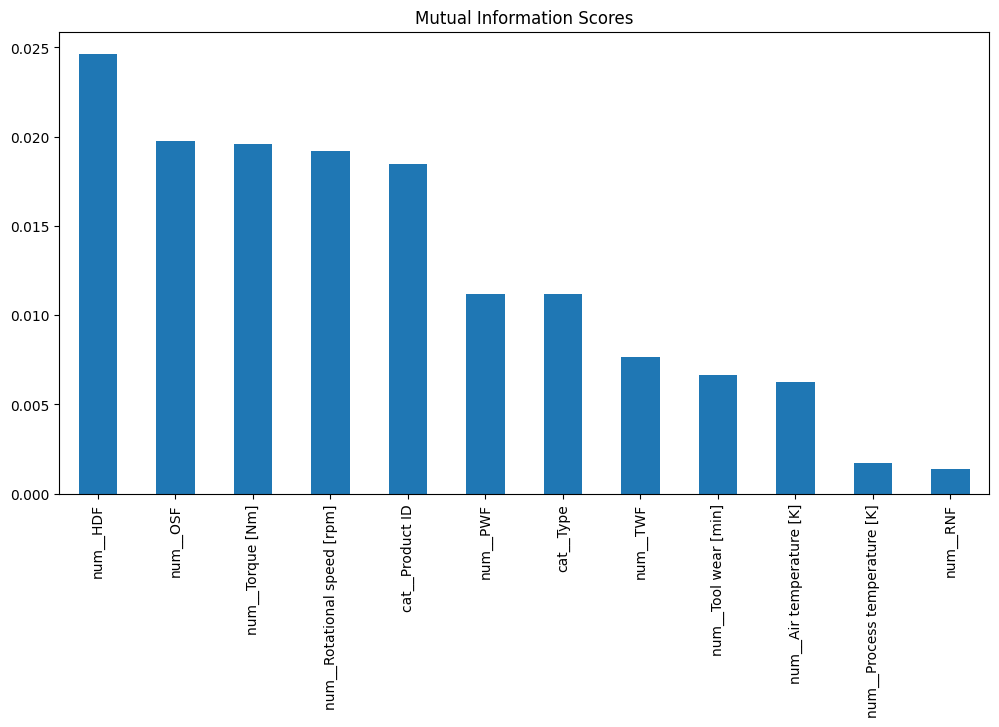

In [111]:
mi.plot(kind='bar', title='Mutual Information Scores', figsize=(12, 6))

## Select top features

In [112]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif, k=4)
sel.fit(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF',
       'num__OSF'], dtype=object)

In [113]:
sel_cols[0].split('__')

['num', 'Rotational speed [rpm]']

In [114]:
sel_cols[0].split('__')[1]

'Rotational speed [rpm]'

In [115]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [116]:
imp_cols

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'OSF']

In [117]:
X_imp = X[imp_cols]
X_imp

,Rotational speed [rpm],Torque [Nm],HDF,OSF
0,1596,36.1,0,0
1,1759,29.1,0,0
2,1805,26.5,0,0
3,1524,44.3,0,0
4,1641,35.4,0,0
...,...,...,...,...
136424,1530,37.5,0,0
136425,1447,49.1,0,0
136426,1524,38.5,0,0
136427,1447,46.3,0,0


In [118]:
cat_sel = list(X_imp.columns[X_imp.dtypes=='object'])
con_sel = list(X_imp.columns[X_imp.dtypes!='object'])

In [119]:
cat_sel

[]

In [120]:
con_sel

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'OSF']

# Build the final sklearn pipeline (Onehotencoder)

In [121]:
from sklearn.preprocessing import OneHotEncoder

In [122]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [123]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('OHE', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [124]:
pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)]).set_output(transform='pandas')

In [125]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Rotational speed [rpm]', 'Torque [Nm]',
                                  'HDF', 'OSF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 [])])

In [126]:
X_pre


,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Product ID,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2752.0,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,8620.0,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2344.0,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,4704.0,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,9727.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,9220.0,2.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,838.0,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,5502.0,1.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,5024.0,1.0


## Apply train test split on X_pre

In [127]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [128]:
xtrain.shape

(109143, 12)

In [129]:
xtest.shape

(27286, 12)

## Preprocessing Completed, Now Algo evaluation

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [131]:
dct = {'Logistic' : LogisticRegression(),
       'Decision Tree' : DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier() }

In [132]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

## Fit the model and evaluate the results on the basis of f1 score

In [133]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [134]:
tr=[]
tr_cv=[]
ts=[]
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain,ytrain)
    # Predict results for train and test
    ypred_tr=model.predict(xtrain)
    ypred_ts=model.predict(xtest)
    # Calculate f1 score in train and test
    f1_tr=f1_score(ytrain,ypred_tr)
    f1_ts=f1_score(ytest,ypred_ts)
    # 5-fold Cross Validation on training
    scores = cross_val_score(model,xtrain,ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    # Print above results for each model
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:0.4f}')
    print(f'Train f1 Cross Validated: {f1_cv:0.4f}')
    print(f'Test F1 : {f1_ts:0.4f}')
    print('\n=======================================================================================\n')


Model name : Logistic

Train F1 : 0.8655
Train f1 Cross Validated: 0.9310
Test F1 : 0.8541


Model name : Decision Tree

Train F1 : 0.9956
Train f1 Cross Validated: 0.8766
Test F1 : 0.7790


Model name : Random Forest

Train F1 : 0.9956
Train f1 Cross Validated: 0.9296
Test F1 : 0.8575


Model name : Gradient Boost

Train F1 : 0.8758
Train f1 Cross Validated: 0.9291
Test F1 : 0.8522




## Save the Results in DataFrame

In [135]:
tr

[0.8654855643044619,
 0.9956204379562044,
 0.9956280967647916,
 0.8758127438231469]

In [136]:
ts

[0.8541114058355438, 0.778972520908005, 0.8575163398692811, 0.8522427440633245]

In [137]:
tr_cv

[0.9309769692298289, 0.8765969817989582, 0.9295584438380331, 0.929139607173466]

In [138]:
dct

{'Logistic': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Gradient Boost': GradientBoostingClassifier()}

In [139]:
list(dct.keys())

['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost']

In [140]:
results_dct={'Model Name' : list(dct.keys()),
             'Train F1': tr,
             'Test F1':ts,
             'Train F1 CV': tr_cv}

In [141]:
results_df=pd.DataFrame(results_dct)
results_df

,Model Name,Train F1,Test F1,Train F1 CV
0,Logistic,0.865486,0.854111,0.930977
1,Decision Tree,0.995620,0.778973,0.876597
2,Random Forest,0.995628,0.857516,0.929558
3,Gradient Boost,0.875813,0.852243,0.929140


In [142]:
results_df=results_df.sort_values(by='Test F1',ascending=False)

In [143]:
results_df

,Model Name,Train F1,Test F1,Train F1 CV
2,Random Forest,0.995628,0.857516,0.929558
0,Logistic,0.865486,0.854111,0.930977
3,Gradient Boost,0.875813,0.852243,0.929140
1,Decision Tree,0.995620,0.778973,0.876597


## Create Logistic Regression Model

In [163]:
best_model = LogisticRegression()
best_model.fit(xtrain,ytrain)

LogisticRegression()

In [164]:
best_model.score(xtrain,ytrain)

0.9962434604143189

In [166]:
best_model.score(xtest, ytest)

0.9959686286007476

## Predict the results for train and test

In [167]:
ypred_tr= best_model.predict(xtrain)
ypred_ts= best_model.predict(xtest)

In [168]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [169]:
ytrain.head()

,Machine failure
29391,0
111006,0
16102,0
110599,0
84638,0


In [170]:
ypred_ts[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [171]:
ytest.head()

,Machine failure
22333,0
35216,0
112970,0
14905,0
25676,0


## Create a Confusion Matrix

In [172]:
c = best_model.classes_
c

array([0, 1], dtype=int64)

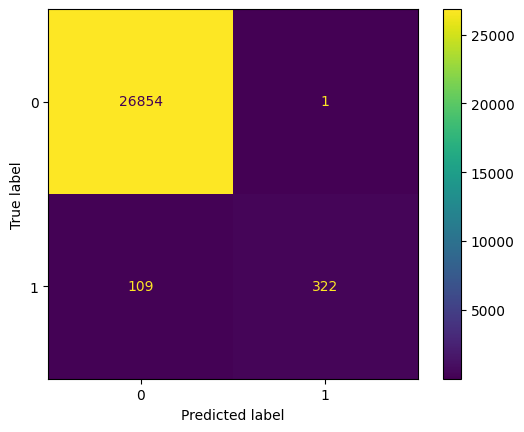

In [173]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=c)
cfd.plot()

## Print Classification Report 

In [174]:
from sklearn.metrics import classification_report
print (classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26855
           1       1.00      0.75      0.85       431

    accuracy                           1.00     27286
   macro avg       1.00      0.87      0.93     27286
weighted avg       1.00      1.00      1.00     27286



## Showing ROC and AUC curve for both train and test data

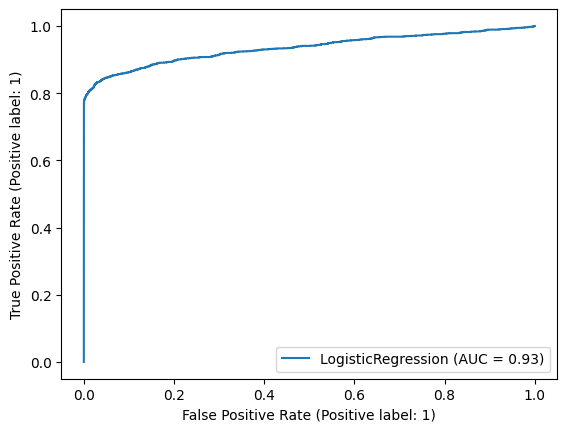

In [175]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model,xtrain,ytrain)

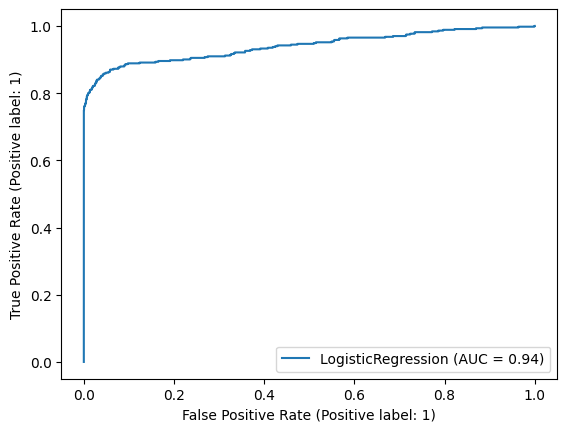

In [176]:
RocCurveDisplay.from_estimator(best_model, xtest, ytest)

## Cross Validate ROC_AUC Score

In [177]:
auc_scores = cross_val_score(best_model, xtrain, ytrain, cv=10, scoring='roc_auc')
auc_scores

array([0.93553455, 0.92403382, 0.92128027, 0.92284518, 0.91703832,
       0.9491381 , 0.95311438, 0.93379849, 0.96016614, 0.92092114])

In [178]:
auc_scores.mean()

0.9337870389961488

## Predict the Testing file

In [179]:
xnew = pd.read_csv('test.csv')

In [180]:
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [181]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [187]:
xnew_pre = pre1.fit_transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Product ID,cat__Type
0,1.313830,1.126570,-0.153806,-0.274579,-0.693494,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,3203.0,1.0
1,0.990824,0.765635,1.375097,-1.356341,-1.366729,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,4986.0,1.0
2,0.775487,0.332512,0.031949,-0.309854,-0.129855,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,2958.0,1.0
3,0.129475,-0.244985,-0.296694,0.854217,-1.554608,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,8828.0,2.0
4,1.906008,1.704068,-0.039496,0.113445,0.151964,-0.038412,-0.073294,-0.048563,-0.062331,-0.048106,8368.0,2.0


In [188]:
preds = best_model.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [189]:
best_model.classes_

array([0, 1], dtype=int64)

In [190]:
probs = best_model.predict_proba(xnew_pre)[:, 1]
probs[0:5]

array([0.00230629, 0.00110693, 0.00257246, 0.00282913, 0.00329022])

In [191]:
df_final = xnew[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [192]:
df_final['Machine failure_pred']=preds
df_final['Machine failure_prob']=probs

In [193]:
df_final

,id,Machine failure_pred,Machine failure_prob
0,136429,0,0.002306
1,136430,0,0.001107
2,136431,0,0.002572
3,136432,0,0.002829
4,136433,0,0.003290
...,...,...,...
90949,227378,0,0.002504
90950,227379,0,0.000653
90951,227380,0,0.002690
90952,227381,0,0.002254


In [194]:
df_final.to_csv('Results.csv', index=False)

In [195]:
df_final['Machine failure_pred'].value_counts()

Machine failure_pred
0    89849
1     1105
Name: count, dtype: int64

<Axes: title={'center': 'Machine failure Prediction Countplot'}, xlabel='Machine failure_pred'>

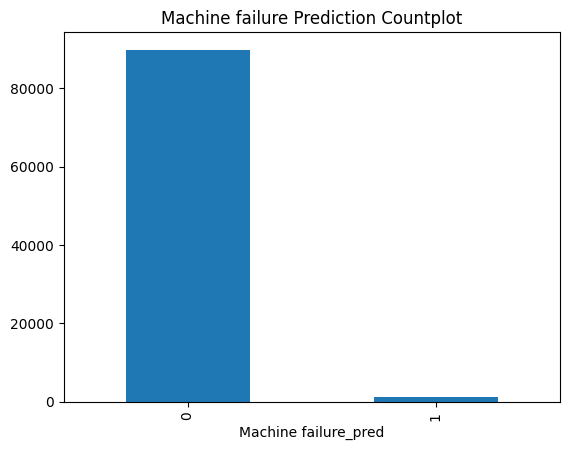

In [197]:
df_final['Machine failure_pred'].value_counts().plot(kind='bar', title='Machine failure Prediction Countplot')